In [48]:
import numpy as np
import matplotlib
import scipy.integrate as sint
import matplotlib.pyplot as plt

pi = np.pi




In [49]:
import constants

q = constants.cgs_constants['q']
c = constants.cgs_constants['c']
m_e = constants.cgs_constants['m_e']
m_p = constants.cgs_constants['m_p']



In [50]:
import solvers
import particles
import fields
import analytic_models

from solvers import symplectic_maps
maps = symplectic_maps()

In [66]:
## Particle definitions 
sigma_x = 0.1
Q_mks = 40.0e-10
Q = constants.charge_mks_to_cgs(Q_mks)

n_particles = 10000
L_0 = 10. * sigma_x ## Half the domain size
L_min = L_0 / 40 ## minimum wavelength to resolve

E = 200000.0e6

## This is where we initialize a gaussian distribuiton
new_distribution = particles.distribution(N = n_particles)
new_distribution.construct_uniform_guassian_2D(sigma_x = sigma_x, 
                sigma_y = sigma_x, sigma_xp = sigma_x * 9.0e-7, sigma_yp = sigma_x * 9.0e-7)

## Particle distributions
my_beam = particles.particles_2D_tent(new_distribution, dx_tent = 1 * L_min, dy_tent = 1 * L_min, 
    bunch_charge = Q, species_charge = q, species_mass = m_p, K_e = E)

## Define the fields 
my_fields = fields.cartesian_2D(L_x = L_0, L_y = L_0,
	L_x_min = L_min, L_y_min = L_min)

print np.sqrt(np.dot(my_beam.x, my_beam.x) / n_particles)


0.09941722719738784


In [67]:

## This is where we instantiate the solver
field_solver = solvers.field_solver_2D()
my_fields.register_solver(field_solver)



In [68]:
def space_charge_step(fields, particles, ds = 0.01):
    
    maps.drift(particles, ds = ds / 2.)
    maps.space_charge_kick_2D(fields, particles, ds = ds)
    maps.drift(particles, ds = ds / 2.)
    
    

In [69]:
def one_turn_map(fields, particles):
    
    maps.drift(particles, ds = 1000.)
    maps.thin_quad(fields, particles, ds = 0.01, kappa = 0.0000)
    maps.drift(particles, ds = 10.)
    maps.thin_quad(fields, particles, ds = 0.01, kappa = 0.0000)
    maps.drift(particles, ds = 1000.)
    
    

In [70]:
def plot_beam(beam):

    plt.figure()
    plt.subplot(2,2,1)
    plt.hexbin(beam.x, beam.px)
    
    plt.subplot(2,2,2)
    plt.hexbin(beam.y, beam.py)
    
    plt.subplot(2,2,3)
    plt.hexbin(beam.x, beam.y)
    
    plt.subplot(2,2,4)
    plt.hexbin(beam.px, beam.py)
    
    plt.show()
    

    

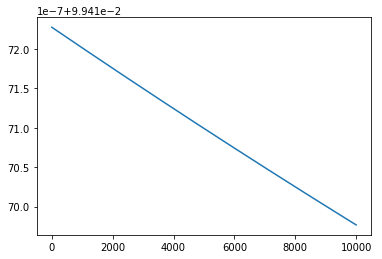

In [71]:
k = 0
rms_x = []
while k < 10000:

    one_turn_map(my_fields, my_beam)
    xx = np.sqrt(np.dot(my_beam.x, my_beam.x) / len(my_beam.x))
      
    rms_x.append(xx)
    k = k + 1
    
plt.figure()
plt.plot(rms_x)